In [22]:
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
import os

RATE = 16000  # 샘플레이트
DATA_PATH = r"C:\Users\HKIT\PycharmProjects\realproject\project\dataset1"

X_data = []
y_data = []

for dataset in os.listdir(DATA_PATH):
    folder_path = os.path.join(DATA_PATH, dataset)

    if os.path.isdir(folder_path):
        label = int(dataset)  # 폴더명을 정수로 변환하여 클래스 레이블로 사용
        files = os.listdir(folder_path)
        print("Foldername :", dataset, "-", len(files), "파일")
        for filename in files:
            file_path = os.path.join(folder_path, filename)

            if filename.endswith('.wav'):
                y, sr = librosa.load(file_path)
                mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13, hop_length=int(sr * 0.01), n_fft=int(sr * 0.02)).T

                X_data.append(mfcc)
                for i in range(len(mfcc)):
                    y_data.append([0, 1] if label else [1, 0])  # [[0, 1], [0, 1], [1, 0], [1, 0]]

X_data = np.concatenate(X_data)
y_data = np.array(y_data)

print("X_data :", X_data.shape)
print("Y_data :", y_data.shape)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data)

Foldername : 0 - 5 파일
Foldername : 1 - 5 파일
X_data : (8307, 13)
Y_data : (8307, 2)


In [23]:
y_train[0]

array([1, 0])

In [24]:
import keras
import tensorflow as tf
from keras.layers import Dense
adam = keras.optimizers.Adam(learning_rate=0.01)
model = tf.keras.Sequential()
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=128, activation='relu'))
# model.add(Dense(units=512, activation='relu'))
# model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=2, activation='sigmoid'))
model.compile(loss="categorical_crossentropy", optimizer=adam, metrics=["accuracy"])

In [25]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/100
98/98 [==============================] - 1s 4ms/step - loss: 5.5321 - accuracy: 0.7852 - val_loss: 0.4564 - val_accuracy: 0.7679
Epoch 2/100
98/98 [==============================] - 0s 2ms/step - loss: 0.3361 - accuracy: 0.8737 - val_loss: 0.2279 - val_accuracy: 0.9191
Epoch 3/100
98/98 [==============================] - 0s 2ms/step - loss: 0.2849 - accuracy: 0.8894 - val_loss: 0.3280 - val_accuracy: 0.8676
Epoch 4/100
98/98 [==============================] - 0s 2ms/step - loss: 0.2107 - accuracy: 0.9162 - val_loss: 0.2033 - val_accuracy: 0.9273
Epoch 5/100
98/98 [==============================] - 0s 2ms/step - loss: 0.2017 - accuracy: 0.9225 - val_loss: 0.1827 - val_accuracy: 0.9254
Epoch 6/100
98/98 [==============================] - 0s 2ms/step - loss: 0.1996 - accuracy: 0.9230 - val_loss: 0.2298 - val_accuracy: 0.8955
Epoch 7/100
98/98 [==============================] - 0s 2ms/step - loss: 0.1667 - accuracy: 0.9332 - val_loss: 0.1578 - val_accuracy: 0.9389
Epoch 8/100
9

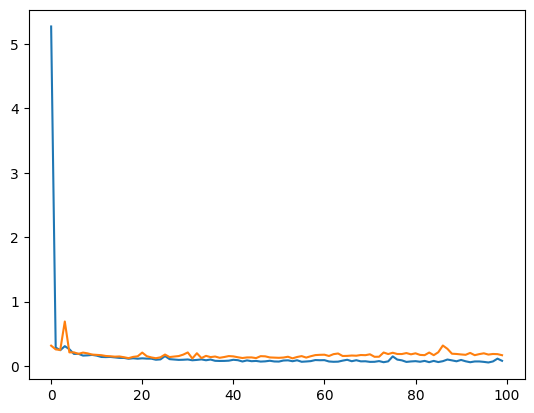

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

In [18]:
y, sr = librosa.load(r"C:\Users\HKIT\PycharmProjects\realproject\project\dataset1\iucopy2.wav")
X_test = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13, hop_length=int(sr*0.01),n_fft=int(sr*0.02)).T
label = [0 for i in range(2)]
label[0] = 1.0
Y_test = []
for i in range(len(X_test)):
    Y_test.append(label)

In [19]:
y_test = model.predict(x=X_test)

32/32 [==============================] - 0s 1ms/step


In [20]:
result2 = model.evaluate(x=X_test, y=np.array(Y_test))[1]

32/32 [==============================] - 0s 1ms/step - loss: 0.5662 - accuracy: 0.8551


[0.5662422180175781, 0.8551448583602905]

In [26]:
from tensorflow.python.keras.models import load_model
model.save('mfcc.h5')